## Bisection Method

Algorithm:
    
* Choose a starting interval [a,b] such that f(a)*f(b)<0
* Compute f(mid) = f((a+b)/2)
* Determine the next sub-interval:
    > * If f(a)* f(mid)<0 then the sub-interval is [a,mid]
    > * If f(b)* f(mid)<0 then the sub-interval is [mid,b]
* We repeat the step for N iterations till the subinterval becomes small enough
* Return the midpoint value $m_N = (a_N+b_N)/2$
    
    

In [1]:
def bisection(f,a,b,N):

    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    
    a_n = a
    b_n = b
    
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
            
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
            
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
    
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2


Let's put this code to test by finding the root of $f(x) = x^2 -x -1$

If we plot the function f(x), we see that the solution lies somewhere in between [1,2]. So, we will use that interval as our first guess for the bisection function.

In [2]:
def func(x):
    return x**2 - x - 1

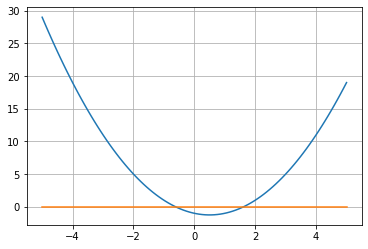

In [64]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,100)
plt.plot(x,func(x))
plt.plot(x,x*0)
plt.grid()
plt.show()

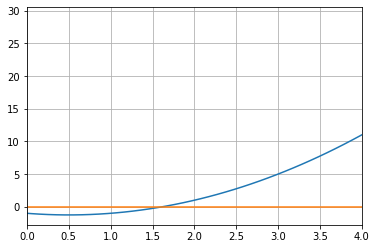

In [65]:
x = np.linspace(-5,5,100)
plt.plot(x,func(x))
plt.plot(x,x*0)
plt.xlim(0,4)
plt.grid()
plt.show()

In [11]:
Niteration = 50

approx_sol = bisection(func,1,2,50)
print(approx_sol)

Found exact solution.
1.618033988749895


Yaay! We got the exact solution when we ran over 50 iterations. A little bit of trivia here. The solution to this polynomial is the very famous **Golden Ratio**.

$$ \phi = \frac{1+\sqrt{5}}{2}$$

We have calculated phi approximately above.

## Newton-Raphson Method

$$x_{n+1} = x_n - \frac{f(x_n)}{f^{'}(x_n)}$$

Algorithm:

* We first consider an intial value $x_0$
* Using the above equation, we find $x_{n+1}$
* We repeat the iterations till:
> * Max_iterations N
> * $f(x_N) < \epsilon$, the algorithm has found the approximate solution $x_N$
> * If $f^{'}(x_N) == 0$, then it fails and we need to stop.

In [16]:
def newton(f,Df,x0,N_max,epsilon=1e-5):
    
    xn = x0
    
    for n in range(0,N_max):
        fxn = f(xn)
        
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn

        Dfxn = Df(xn)
        
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        
        xn = xn - fxn/Dfxn
        
    print('Exceeded maximum iterations. No solution found.')
    return None

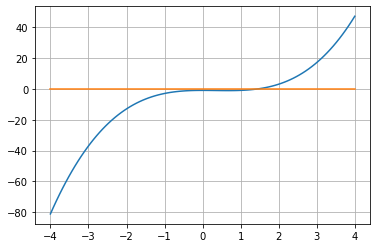

In [66]:
def poly(x):
    return x**3 - x**2 - 1

def dpoly(x):
    return 3*x**2 - 2*x


x = np.linspace(-4,4,100)
plt.plot(x,poly(x))
plt.plot(x,poly(x)*0)
plt.grid()
plt.show()

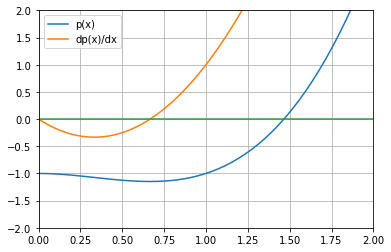

In [31]:
x = np.linspace(-2,2,100)
plt.plot(x,poly(x),label="p(x)")
plt.plot(x,dpoly(x),label="dp(x)/dx")
plt.plot(x,poly(x)*0)
plt.grid()
plt.xlim(0,2)
plt.ylim(-2,2)
plt.legend()
plt.show()

So, we can see that the root lies somewhere between 1 and 2. Also we are safe to use Newton's method as the derivative is not zero from the dp(x)/dx plot.

In [20]:
approx = newton(poly,dpoly,1,10,1e-10)
print(approx)

Found solution after 6 iterations.
1.4655712318767877


## Secant Method

Let f(x) on the interval[a,b] such that f(a)f(b)<0. A solution of the equation f(x) from the Intermediate Valur Theorem.


$$ x = a - f(a) \frac{b-a}{f(b)-f(a)}$$

Algorithm:

* Choose a starting interval [a,b] such that f(a)f(b)<0.
* Compute $f(x_0)$ where $x_0$ is given by the equation above.
* Determine the next subinterval:
> * If $f(a)f(x_0) < 0$ then the next interval will be $[a,x_0]$
> * If $f(b)f(x_0) < 0$ then the next interval will be $[x_0,b]$
* Repeat this for N iterations till we get an approximate value.

In [32]:
def secant(f,a,b,N):

    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    
    a_n = a
    b_n = b
    
    for n in range(1,N+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
            
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
            
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        
        else:
            print("Secant method fails.")
            return None
        
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

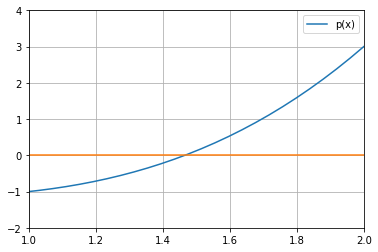

In [35]:
x = np.linspace(-2,2,100)
plt.plot(x,poly(x),label="p(x)")
plt.plot(x,poly(x)*0)
plt.grid()
plt.xlim(1,2)
plt.ylim(-2,4)
plt.legend()
plt.show()

In [46]:
approx = secant(poly,1,2,20)
print(approx)

1.4655712311394433


## Newton-Bisection Hybrid Method

We have a slow but sure algorithm(Bisection) and a fast but somewhat risky method(Newton). We can now make a hybrid of the two and see if that works better.

Algorithm:

* Start with a guess interval [a,b]
* Find the modpoint, $ x_i = \frac{a+b}{2}$
* If $f'(x)$ is not zero use Newton's to find $x_i+1$
* Check if $ x_{i+1} \in (a,b)$. If it does:
* For the next interval:
> * If $f(a)*f(x_i) < 0$ then $[a,x_i]$
> * else $[x_i,b]$
* Otherwise use bisection again



In [51]:
def Hybrid(f,df,a,b,N,epsilon=1e-5):

    if f(a)*f(b) >= 0:
        print("Hybrid method fails.")
        return None
    
    a_n = a
    b_n = b
    
    xn = (a_n+b_n)/2
    
    for n in range(1,N+1):
        
        
        
        if(np.abs(f(xn))<epsilon):
            print('Found solution after',n,'iterations.')
            return xn
        
        elif(df(xn)!= 0):
            
            xn = xn - f(xn)/df(xn)
            
            if (xn>a_n and xn<b_n):
                
                if f(a_n)*f(xn) < 0:
                    a_n = a_n
                    b_n = xn
            
                elif f(b_n)*f(xn) < 0:
                    a_n = x_n
                    b_n = b_n
            
            else: 
                
                if f(a_n)*f(xn) < 0:
                    a_n = a_n
                    b_n = xn
            
                elif f(b_n)*f(xn) < 0:
                    a_n = x_n
                    b_n = b_n
                
                xn = (a_n+b_n)/2
                 
        elif f(a_n)*f(xn) < 0:
            a_n = a_n
            b_n = xn
            
        elif f(b_n)*f(xn) < 0:
            a_n = x_n
            b_n = b_n
                
            xn = (a_n+b_n)/2

            
        elif f(xn)== 0:
            print("Found exact solution.")
            return xn
        
        else:
            print("Secant method fails.")
            return None

In [52]:
approx = Hybrid(poly,dpoly,1,2,20)
print(approx)

Found solution after 3 iterations.
1.4655723905723905


Nice! So our hybrid works faster!

## Brute-Force Method

What about the case when we have multiple roots and I want to find all of them? We deploy a Brute-force method for that.

Algorithm:

* Choose a whole range of n where you want to find f(x)
* Divide the range into small intervals and using two consecutive intervals, apply secant method.
* Continue this till the end of the interval

In [53]:
def bruteforce(f, a, b, n):
    x = np.linspace(a, b, n)
    y = f(x)
    roots = []
    
    for i in range(n-1):
        if y[i]*y[i+1] < 0:
            root = x[i] - (x[i+1] - x[i])/(y[i+1] - y[i])*y[i]
            roots.append(root)
            
    return roots

In [63]:
bruteforce(poly,-4,3,100)

[1.4645776823387582]

Now, let's try another function $f(x) = e^{-x^2} cos(x)$

In [68]:
def fe(x):
    return np.exp(- x**2)*np.cos(x)

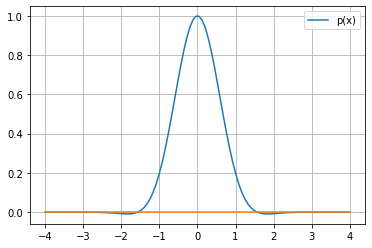

In [76]:
x = np.linspace(-4,4,100)
plt.plot(x,fe(x),label="p(x)")
plt.plot(x,fe(x)*0)
plt.grid()
plt.legend()
plt.show()

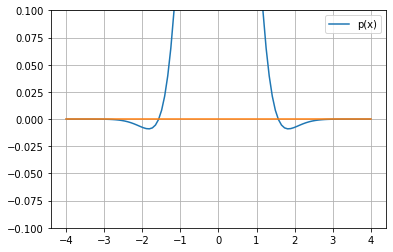

In [80]:
x = np.linspace(-4,4,100)
plt.plot(x,fe(x),label="p(x)")
plt.plot(x,fe(x)*0)
plt.grid()
plt.legend()
plt.ylim(-0.1,0.1)
plt.show()

Hmmmm, so this guy has two solutions! Let us put brute force under test.

In [82]:
bruteforce(fe,-4,4,100)

[-1.5718300431188483, 1.5718300431188483]

Voila! It gives me both the roots approximately aroubd -1.6 and 1.6